In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MHM\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
df = pd.read_csv("data/BA_reviews.csv", index_col=0)
df.head()

,reviews
0,"Not Verified | The worst service ever, my bag..."
1,✅ Trip Verified | 4/4 flights we booked this ...
2,✅ Trip Verified | British Airways has a total...
3,"✅ Trip Verified | London Heathrow to Keflavik,..."
4,✅ Trip Verified | Mumbai to London Heathrow in...


Remove unneccesary words:

In [3]:
df["reviews"]= df["reviews"].transform(lambda x: x.replace("✅ Trip Verified |" , ""))
df["reviews"] = df["reviews"].transform(lambda x: x.replace("Not Verified | ", ""))
df.head()

,reviews
0,"The worst service ever, my baggage did not ar..."
1,4/4 flights we booked this holiday were dela...
2,British Airways has a total lack of respect ...
3,"London Heathrow to Keflavik, Iceland in Busin..."
4,Mumbai to London Heathrow in Business Class o...


Sentiment analysis using VADER from nltk:  
negative, neutral, positive and compound. The compound is between -1 and 1. -1 is very negative

In [5]:
sia = SentimentIntensityAnalyzer()
results = {}
for i, row in df.iterrows():
    text = row["reviews"]
    results[i] = sia.polarity_scores(text)



In [8]:
# This is the analysis of the first review:
""" The worst service ever, my baggage did not arrive on time.\
    Both my flights were delayed. I will never fly them again.\
    Even the food was bad and your service."""
results[0]

{'neg': 0.268, 'neu': 0.732, 'pos': 0.0, 'compound': -0.8591}

In [15]:
# Convert it to DataFrame:
sentiments = pd.DataFrame(results)

# Concatinate with the original df: 
BA_reviews = pd.concat([df,sentiments.T], axis=1)

BA_reviews.head()

,reviews,neg,neu,pos,compound
0,"The worst service ever, my baggage did not ar...",0.268,0.732,0.000,-0.8591
1,4/4 flights we booked this holiday were dela...,0.198,0.702,0.100,-0.2698
2,British Airways has a total lack of respect ...,0.087,0.850,0.064,-0.8370
3,"London Heathrow to Keflavik, Iceland in Busin...",0.026,0.891,0.083,0.7218
4,Mumbai to London Heathrow in Business Class o...,0.015,0.851,0.134,0.9698


Text(0.5, 1.0, 'positive dist')

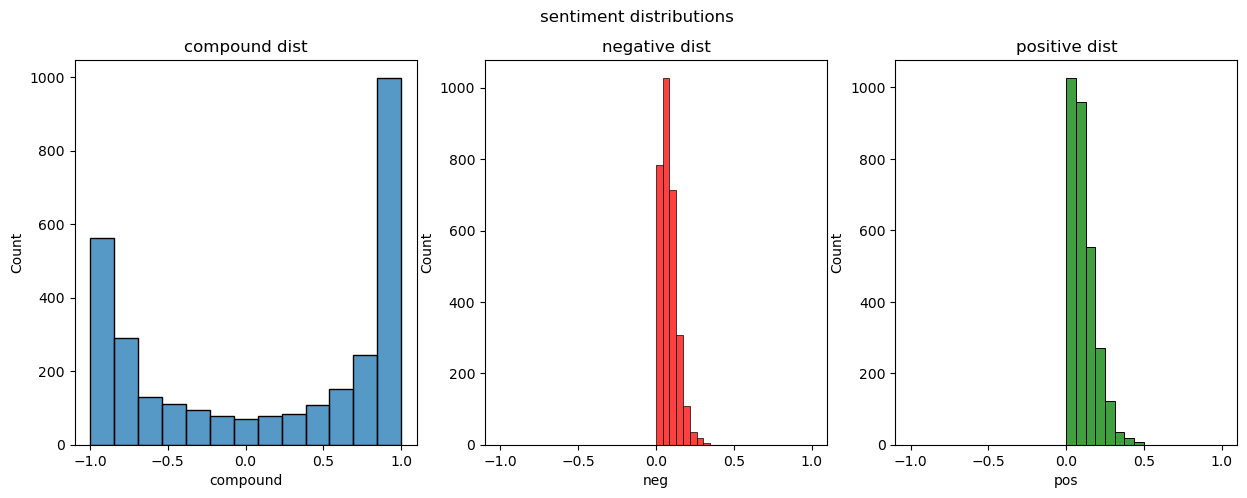

In [43]:
import seaborn as sns

fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
fig.suptitle('sentiment distributions')

axes[0]=sns.histplot(BA_reviews, ax=axes[0], x="compound")
axes[0].set_title('compound dist')

axes[1]=sns.histplot(BA_reviews, ax=axes[1], x="neg", color='r', bins=8)
axes[1].set_title('negative dist')

axes[2]=sns.histplot(BA_reviews, ax=axes[2], x="pos", color='g', bins=8)
axes[2].set_title('positive dist')

In [21]:
nltk.download('stopwords')
stp_words=stopwords.words('english')
def clean_review(review):
    cleanreview=" ".join(word for word in review.split() if word not in stp_words)
    return cleanreview

BA_reviews['clean_reviews']=BA_reviews['reviews'].apply(clean_review)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MHM\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [22]:
BA_reviews.head()

,reviews,neg,neu,pos,compound,clean_reviews
0,"The worst service ever, my baggage did not ar...",0.268,0.732,0.000,-0.8591,"The worst service ever, baggage arrive time. B..."
1,4/4 flights we booked this holiday were dela...,0.198,0.702,0.100,-0.2698,4/4 flights booked holiday delayed 1-2 hours. ...
2,British Airways has a total lack of respect ...,0.087,0.850,0.064,-0.8370,British Airways total lack respect customers. ...
3,"London Heathrow to Keflavik, Iceland in Busin...",0.026,0.891,0.083,0.7218,"London Heathrow Keflavik, Iceland Business Cla..."
4,Mumbai to London Heathrow in Business Class o...,0.015,0.851,0.134,0.9698,Mumbai London Heathrow Business Class ageing B...


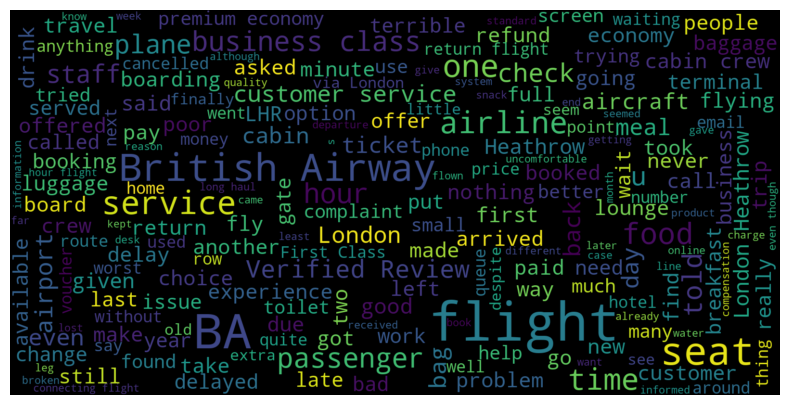

In [45]:
from wordcloud import WordCloud

consolidated=' '.join(word for word in BA_reviews['clean_reviews'][BA_reviews['compound'] <= -0.5].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,5))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

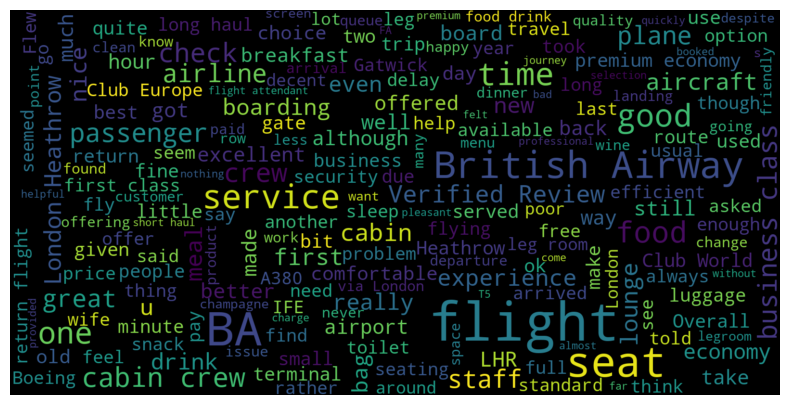

In [46]:
consolidated=' '.join(word for word in BA_reviews['clean_reviews'][BA_reviews['compound'] >= 0.5].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,5))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

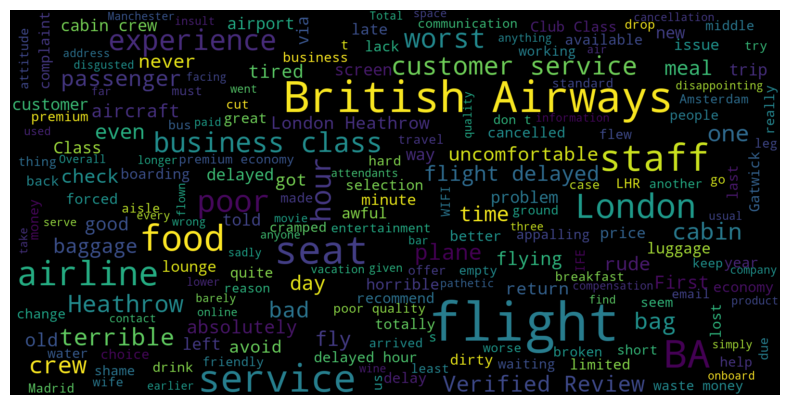

In [47]:
consolidated=' '.join(word for word in BA_reviews['clean_reviews'][BA_reviews['neg'] >= 0.2].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,5))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

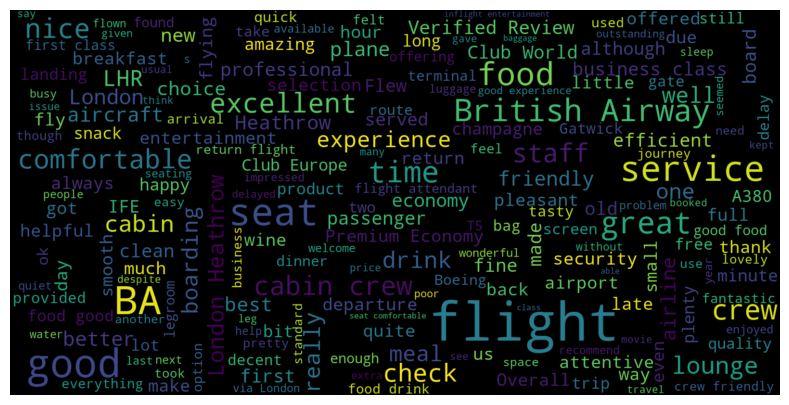

In [48]:
consolidated=' '.join(word for word in BA_reviews['clean_reviews'][BA_reviews['pos'] >= 0.2].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,5))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()